In [1]:
# This notebook identifies a ball in radar data
# range_doppler_notebook has the basics of how to get the basics (what was I thinking when I wrote this)

import h5py
import numpy as np
import matplotlib.pyplot as plt
from radar_ffts import range_doppler_fft, range_doppler_sum
from cfar import cfar, clean_cfar
from radar_functions import get_measurement_parameters, get_data_files, range_doppler_map, cfar_map, make_map, save_map

# This was before creating the new functions
# from radar_functions import range_doppler_map, get_measurement_parameters, cfar_map, save_range_doppler_map, save_cfar_map, get_data_files


c = 299792458 # metres per second - need this

In [2]:
# Making data lists
#moving_back_test = h5py.File('../4022S_data/undergrad_testset/Experiment_moving_target_back_data.hdf5', 'r') # Read in the file
#one_meter_centre_test = h5py.File('../4022S_data/undergrad_testset/Experiment_stationary_target_1m_1_data.hdf5','r')
#two_meter_centre_test = h5py.File('../4022S_data/undergrad_testset/Experiment_stationary_target_2m_1_data.hdf5','r')

#golfball_testset1 = '../4022S_data/golfball_testset1/'
#session2_directory = '../4022S_data/session2/'
#session3_directory = ['../4022S_data/session3/config1_rob/']
#session4_directory = ['../4022S_data/session4/calibration/']
#tennis_ball_tests = get_data_files(session2_preface) # This works pretty well. Should make new folders for different tests/sets, but this works as a good basis

#session4 = get_data_files(session4_directory[0])
#session3_rob = get_data_files(session3_directory[0])

session5_directory = ['../4022S_data/session5/rob_config/test1_calibration/',
                    '../4022S_data/session5/rob_config/test2_motion_calibration/',
                    '../4022S_data/session5/rob_config/test3_basketball_throw/',
                    '../4022S_data/session5/rob_config/test4_tennis_throw/',
                    '../4022S_data/session5/rob_config/test5_golf_throw/',
                    '../4022S_data/session5/rob_config/test6_soccer_roll/',
                    '../4022S_data/session5/rob_config/test7_tennis_roll/',
                    '../4022S_data/session5/rob_config/test8_golf_roll/',
                    '../4022S_data/session5/rob_config/test9_tennis_golf_similar_roll/']

# session5_directory = ['../4022S_data/session5/rob_config/test8_golf_roll/',
#                       '../4022S_data/session5/rob_config/test9_tennis_golf_similar_roll/']

session5_data = []

for i in range(len(session5_directory)):
    loaded_data = get_data_files(session5_directory[i])
    session5_data.append(loaded_data)

tests_in_question = session5_data

freq_slope_const, number_of_samples_per_chirp, sample_rate, Tdata, bandwidth, range_bin_size, velocity_resolution = get_measurement_parameters(tests_in_question[0][0])

session5_frames_directory = ['frames/test1_calibration/',
                             'frames/test2_motion_calibration/',
                             'frames/test3_basketball_throw/',
                             'frames/test4_tennis_throw/',
                             'frames/test5_golf_throw/',
                             'frames/test6_soccer_roll/',
                             'frames/test7_tennis_roll/',
                             'frames/test8_golf_roll/',
                             'frames/test9_tennis_golf_similar_roll/']

# session5_frames_directory = ['frames/test8_golf_roll/',
#                              'frames/test9_tennis_golf_similar_roll/']


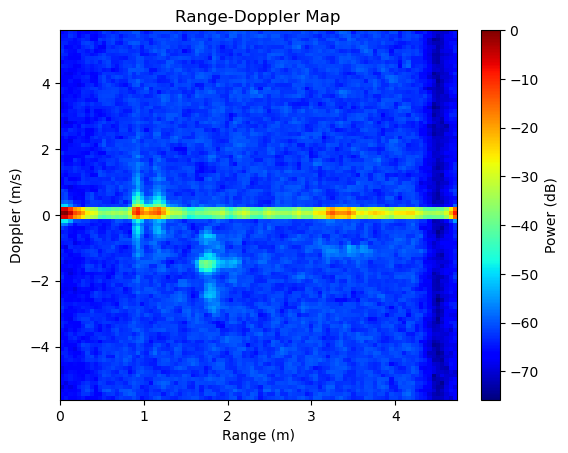

In [6]:
# Just want to output a single channel RDM
test_number = 0
frame_number = 68

target_test = session5_data[5][test_number]

rd_map = range_doppler_map(target_test, frame_number, True)

In [ ]:
# This version lets us just work on one experiment rather than the entire dataset
# An experiment being what kind of data was captured
# Dataset has experiments in it, which have tests in them

experiment_number = int(input("What test are we doing")) - 1

target_tests = session5_data[experiment_number] # Change this as needed


test_number = 0
frame_number = 0

test_being_saved = target_tests[test_number]
while True:
        try:
            print(f'Saving range-doppler map {test_number} frame {frame_number} into {session5_frames_directory[experiment_number]}')
            rd_map = range_doppler_map(test_being_saved, frame_number, False)
            save_map(rd_map,
                        range_bin_size,
                        velocity_resolution,
                        False,
                        f'range-doppler map test {test_number} frame {frame_number}',
                        session5_frames_directory[experiment_number])
            
            print(f'Saving cfar map {test_number} frame {frame_number} into {session5_frames_directory[experiment_number]}')
            cf_map = cfar_map(rd_map, range_bin_size, velocity_resolution, False)
            save_map(cf_map,                                                        # Target map
                        range_bin_size,                                                # range bins
                        velocity_resolution,                                           #
                        True,
                        f'cfar map test {test_number} frame {frame_number}',     # name
                        session5_frames_directory[experiment_number])                  # directory saved to
            
            frame_number += 1
        except:
            print("Done!")
            frame_number = 0
            test_number += 1
            break 


In [4]:
# Need to take all frames of a target and generate all the maps
frame_number = 0
test_number = 0

#Session 5 is broken up into a number of experiments, each containing a number of tests

for experiment_number in range(len(session5_data)):
    for test_being_saved in session5_data[experiment_number]:
        while True:
            try:
                print(f'Saving range-doppler map {test_number} frame {frame_number} into {session5_frames_directory[experiment_number]}')
                rd_map = range_doppler_map(test_being_saved, frame_number, False)
                save_map(rd_map,
                         range_bin_size,
                         velocity_resolution,
                         False,
                         f'range-doppler map test {test_number} frame {frame_number}',
                         session5_frames_directory[experiment_number])
                
                print(f'Saving cfar map {test_number} frame {frame_number} into {session5_frames_directory[experiment_number]}')
                cf_map = cfar_map(rd_map, range_bin_size, velocity_resolution, False)
                save_map(cf_map,                                                        # Target map
                         range_bin_size,                                                # range bins
                         velocity_resolution,                                           #
                         True,
                         f'cfar map test {test_number} frame {frame_number}',     # name
                         session5_frames_directory[experiment_number])                  # directory saved to
                
                frame_number += 1
            except:
                print("Onto the next test")
                frame_number = 0
                test_number += 1
                break

Saving range-doppler map 0 frame 0 into frames/test8_golf_roll/
Saving cfar map 0 frame 0 into frames/test8_golf_roll/
Saving range-doppler map 0 frame 1 into frames/test8_golf_roll/
Saving cfar map 0 frame 1 into frames/test8_golf_roll/
Saving range-doppler map 0 frame 2 into frames/test8_golf_roll/
Saving cfar map 0 frame 2 into frames/test8_golf_roll/
Saving range-doppler map 0 frame 3 into frames/test8_golf_roll/
Saving cfar map 0 frame 3 into frames/test8_golf_roll/
Saving range-doppler map 0 frame 4 into frames/test8_golf_roll/
Saving cfar map 0 frame 4 into frames/test8_golf_roll/
Saving range-doppler map 0 frame 5 into frames/test8_golf_roll/
Saving cfar map 0 frame 5 into frames/test8_golf_roll/
Saving range-doppler map 0 frame 6 into frames/test8_golf_roll/
Saving cfar map 0 frame 6 into frames/test8_golf_roll/
Saving range-doppler map 0 frame 7 into frames/test8_golf_roll/
Saving cfar map 0 frame 7 into frames/test8_golf_roll/
Saving range-doppler map 0 frame 8 into frames/t

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x797f181414c0>>
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Saving range-doppler map 2 frame 303 into frames/test8_golf_roll/
Saving cfar map 2 frame 303 into frames/test8_golf_roll/
